### SVM Kernel

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y =np.sqrt(10*2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

C:\Users\ACER\AppData\Local\Temp\ipykernel_10568\414895994.py:5: RuntimeWarning: invalid value encountered in sqrt
  y =np.sqrt(10*2 - x**2)


In [3]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 =np.hstack([y1, -y1])
x1=np.hstack([x1,-x1])

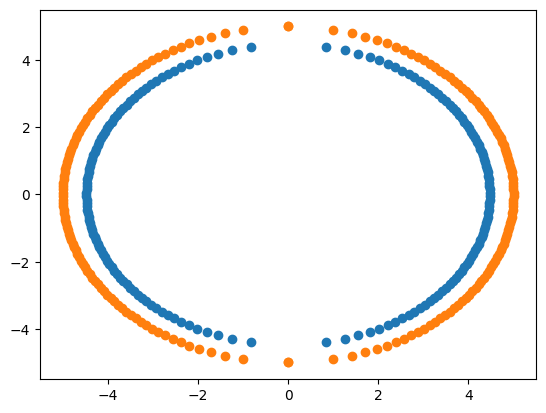

In [6]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [11]:
import pandas as pd
import numpy as np

# Example: Assuming x, y, x1, y1 are 1D arrays of equal length
df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df1['Y'] = 0

df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1

# Correct way to combine
df = pd.concat([df1, df2], ignore_index=True)

print(df.head(5))


   X1       X2  Y
0 NaN -5.00000  0
1 NaN -4.89899  0
2 NaN -4.79798  0
3 NaN -4.69697  0
4 NaN -4.59596  0


In [12]:
df.tail()

,X1,X2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


In [13]:
df.head()

,X1,X2,Y
0,NaN,-5.00000,0
1,NaN,-4.89899,0
2,NaN,-4.79798,0
3,NaN,-4.69697,0
4,NaN,-4.59596,0


In [17]:
## Independent and dependent features
X = df.iloc[:, :2]
y = df.Y

In [18]:
## Split the datasets inot train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
df['X1_Square']=df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2']=(df['X1'] * df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,NaN,-5.00000,0,NaN,25.000000,NaN
1,NaN,-4.89899,0,NaN,24.000102,NaN
2,NaN,-4.79798,0,NaN,23.020610,NaN
3,NaN,-4.69697,0,NaN,22.061524,NaN
4,NaN,-4.59596,0,NaN,21.122845,NaN


In [20]:
X = df[['X1', 'X2', 'X1_Square', 'X2_Square', 'X1*X2']]
y = df['Y']

In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [23]:
! pip install plotly 

  Using cached plotly-6.2.0-py3-none-any.whl.metadata (8.5 kB)
Using cached plotly-6.2.0-py3-none-any.whl (9.6 MB)

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]

In [25]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z ='X1*X2',
                    color='Y')

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [27]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values